 import libraries

In [1]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

import seaborn as sns

import pickle
##from SCRIPT.eval_tools import *

 let's load some data! 🥒

In [2]:
with open('pickle/timeseries_all_types_percent.pkl', 'rb') as fp:
    all_types_percent = pickle.load(fp)

In [3]:
with open('pickle/timeseries_all_types_price.pkl', 'rb') as fp:
    all_types_price = pickle.load(fp)

In [4]:
all_types_percent.head(5)

,95823,95630,95624,95758,95608,95828,95670,95757,95843,95610,...,95814,95626,95811,95683,95693,95638,95830,95690,95615,95641
02/2000,0.423088,0.426140,0.383225,0.435893,0.424580,0.443846,0.356504,0.405643,0.422200,0.381742,...,1.176713,0.127834,0.253903,0.359671,0.440807,0.406461,0.015487,0.042141,0.193816,0.250594
03/2000,0.549264,0.490002,0.458747,0.557671,0.548139,0.462148,0.509916,0.508954,0.528079,0.459244,...,1.224674,0.439592,0.303530,0.138847,0.313231,0.187084,0.469592,1.637594,1.080329,-0.040444
04/2000,0.993836,0.897727,0.849793,0.984449,0.906695,0.934007,0.890109,1.361996,0.938452,0.909049,...,1.231204,0.899892,0.281041,0.507992,0.917569,0.881170,0.577798,1.372764,1.089487,-0.873836
05/2000,1.009772,0.941638,0.931632,1.043712,0.952461,1.012213,0.933963,1.122163,0.994388,1.061821,...,1.159170,0.898309,0.674380,0.497286,1.070674,1.364971,0.438756,1.986458,1.217791,-0.667816
06/2000,0.891054,0.832905,0.802368,0.891565,0.716507,0.967830,0.604500,0.507875,0.891359,1.016627,...,0.082769,0.570366,0.304769,0.643434,0.779534,2.259647,0.106485,0.625460,-0.115392,-0.620370


In [5]:
all_types_price.head()

,95823,95630,95624,95758,95608,95828,95670,95757,95843,95610,...,95814,95626,95811,95683,95693,95638,95830,95690,95615,95641
01/2000,114397.0,236542.0,188923.0,172290.0,174761.0,127747.0,152032.0,195492.0,156324.0,151411.0,...,155518.0,137679.0,156753.0,243278.0,284478.0,217733.0,316396.0,173230.0,176456.0,177578.0
02/2000,114881.0,237550.0,189647.0,173041.0,175503.0,128314.0,152574.0,196285.0,156984.0,151989.0,...,157348.0,137855.0,157151.0,244153.0,285732.0,218618.0,316445.0,173303.0,176798.0,178023.0
03/2000,115512.0,238714.0,190517.0,174006.0,176465.0,128907.0,153352.0,197284.0,157813.0,152687.0,...,159275.0,138461.0,157628.0,244492.0,286627.0,219027.0,317931.0,176141.0,178708.0,177951.0
04/2000,116660.0,240857.0,192136.0,175719.0,178065.0,130111.0,154717.0,199971.0,159294.0,154075.0,...,161236.0,139707.0,158071.0,245734.0,289257.0,220957.0,319768.0,178559.0,180655.0,176396.0
05/2000,117838.0,243125.0,193926.0,177553.0,179761.0,131428.0,156162.0,202215.0,160878.0,155711.0,...,163105.0,140962.0,159137.0,246956.0,292354.0,223973.0,321171.0,182106.0,182855.0,175218.0


  train test split

In [6]:
trdf_percent = all_types_percent.iloc[:-40]
trdf_percent.index = pd.to_datetime(trdf_percent.index)

In [7]:
trdf_price = all_types_price.iloc[:-40]
trdf_price.index = pd.to_datetime(trdf_price.index)

 Average Percent Increase of Housing Price

In [8]:
all_types_percent.head(3)

,95823,95630,95624,95758,95608,95828,95670,95757,95843,95610,...,95814,95626,95811,95683,95693,95638,95830,95690,95615,95641
02/2000,0.423088,0.426140,0.383225,0.435893,0.424580,0.443846,0.356504,0.405643,0.422200,0.381742,...,1.176713,0.127834,0.253903,0.359671,0.440807,0.406461,0.015487,0.042141,0.193816,0.250594
03/2000,0.549264,0.490002,0.458747,0.557671,0.548139,0.462148,0.509916,0.508954,0.528079,0.459244,...,1.224674,0.439592,0.303530,0.138847,0.313231,0.187084,0.469592,1.637594,1.080329,-0.040444
04/2000,0.993836,0.897727,0.849793,0.984449,0.906695,0.934007,0.890109,1.361996,0.938452,0.909049,...,1.231204,0.899892,0.281041,0.507992,0.917569,0.881170,0.577798,1.372764,1.089487,-0.873836


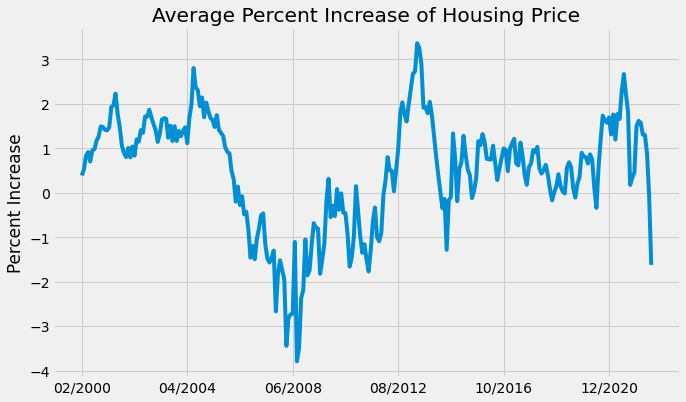

In [9]:
mean = np.mean(all_types_percent, axis = 1)
ax = mean.plot(figsize = (10, 6))
plt.ylabel('Percent Increase')
plt.title('Average Percent Increase of Housing Price')
plt.show()

Average Housing Price

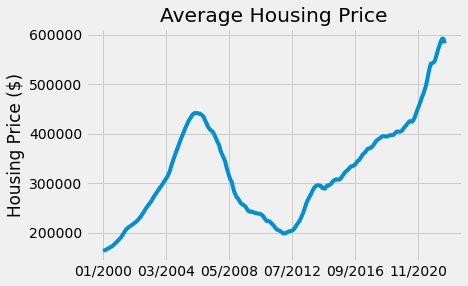

In [10]:
price_mean = np.mean(all_types_price, axis = 1)
ax = price_mean.plot(figsize = (6, 4))
plt.ylabel('Housing Price ($)')
plt.title('Average Housing Price')
plt.show()

 Percent Increase All Zip Codes

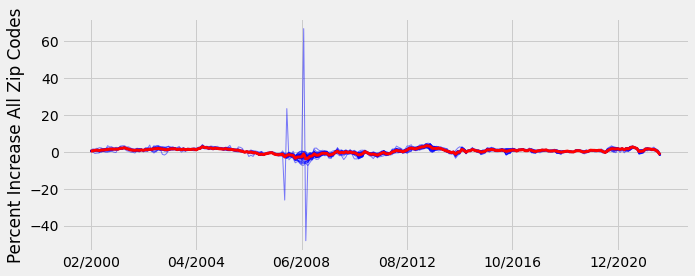

In [11]:
all_types_percent.plot(figsize = (10, 4), lw = 1, color = 'blue', alpha = 0.5)
mean.plot(c = 'red', lw = 3)
plt.legend().set_visible(False)
plt.ylabel('Percent Increase All Zip Codes')
plt.show()

 Housing Price ($) All Zip Codes

In [12]:
all_types_price.head(3)

,95823,95630,95624,95758,95608,95828,95670,95757,95843,95610,...,95814,95626,95811,95683,95693,95638,95830,95690,95615,95641
01/2000,114397.0,236542.0,188923.0,172290.0,174761.0,127747.0,152032.0,195492.0,156324.0,151411.0,...,155518.0,137679.0,156753.0,243278.0,284478.0,217733.0,316396.0,173230.0,176456.0,177578.0
02/2000,114881.0,237550.0,189647.0,173041.0,175503.0,128314.0,152574.0,196285.0,156984.0,151989.0,...,157348.0,137855.0,157151.0,244153.0,285732.0,218618.0,316445.0,173303.0,176798.0,178023.0
03/2000,115512.0,238714.0,190517.0,174006.0,176465.0,128907.0,153352.0,197284.0,157813.0,152687.0,...,159275.0,138461.0,157628.0,244492.0,286627.0,219027.0,317931.0,176141.0,178708.0,177951.0


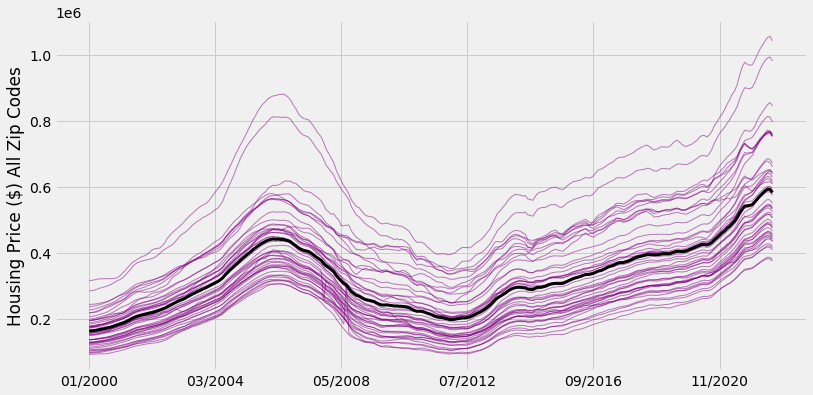

In [13]:
all_types_price.plot(figsize = (12, 6), lw = 1, color = 'purple', alpha = 0.5)
price_mean.plot(c = 'black', lw = 3)
plt.legend().set_visible(False)
plt.ylabel('Housing Price ($) All Zip Codes')
plt.show()

 areas against the trend

 calculate absolute difference

In [14]:
diff_df = trdf_price.apply(lambda x: abs(x-mean))

 top 5 zipcodes with odd trends  

In [15]:
diffs = np.sum(diff_df, axis = 0).sort_values(ascending = False)
select_zipcodes = list(diffs.index[0:5])
print(f'top 5 zipcodes with odd trends: {select_zipcodes}')

top 5 zipcodes with odd trends: [95823, 95630, 95834, 95815, 95829]


 zip closest to average

In [16]:
print(f'closest to the average: {diffs.index[-2]}')

closest to the average: 95632
